<a href="https://colab.research.google.com/github/Kirigi-star/Kirigi-star/blob/main/data_analysis1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', 1000)

## Data Analysis

Data Analysis is all about answering questions about our data. It's almost like asking your data some questions. Most times, you have some questions in mind and you want to know the answers(like the problem statement). Other times, you don't have any questions in mind and you just want to explore the data to see if you can find anything interesting. For this notebook, we'll be taking both approaches. We'll do this table by table for our `risk_communications` dataset.


#### Questions we'll be answering
1. What is the percentage awareness of COVID-19 among our respondents?
2. What is the most common prevention step for COVID-19 according to the dataset?
3. In different regions, what prevention measures for COVID-19 were applied?
4. What is the most common source of information for COVID-19 according to the dataset?
5. What is the most common action taken by respondents when they feel sick?
6. What is the most common action taken by respondents when they feel sick in different regions?
7. What info do the respondents desire, and not know about COVID-19?

#### Individual info

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [13]:
individual_df = pd.read_csv('/content/drive/MyDrive/Nawiri Tech/individual_info.csv')

In [14]:
individual_df.head(5)

,id,Region,Gender,Age,School_Education,Occupation,Aware_Coronavirus,Know_About_Coronavirus,Personal_Risk,Stigma_Perception
0,1000205,Ahafo,Female,20.0,Tertiary/University,Teacher,Yes,It’s a virus that can cause a disease,Yes,No
1,1000176,Central,Female,22.0,Tertiary/University,Student,Yes,It’s a virus that can cause a disease,Yes,Yes
2,1000301,Western,Female,21.0,Primary/Mid/Secondary,Student,Yes,It’s a virus that can cause a disease,Yes,No
3,1000315,Western,Female,24.0,Tertiary/University,Student,Yes,It’s a virus that can cause a disease,No,Yes
4,1000187,Western,Female,23.0,Tertiary/University,Student,Yes,It’s a virus that can cause a disease,No,Yes


Q: How many people participated in the survey?

Since each record is an observation or a person, this should be easy to answer. It is just the number of records in the dataset.<br>
Use the attribute `.shape` to answer this question.

In [15]:
individual_df.shape

(222, 10)

Q: What regions did the respondents come from?<br>
*Hint: You can use value_counts() or unique()*

In [17]:
individual_df.Region.value_counts()

,count
Region,
Western,107
Central,26
Greater Accra,24
Volta,24
Ashanti,21
Western North,11
Ahafo,4
Eastern,3
Northern,1


We can also get this in percents...

In [18]:
individual_df.Region.value_counts(normalize=True)*100

,proportion
Region,
Western,48.198198
Central,11.711712
Greater Accra,10.810811
Volta,10.810811
Ashanti,9.459459
Western North,4.954955
Ahafo,1.801802
Eastern,1.351351
Northern,0.450450


In the above, it means that 48.1% of the respondents came from the Western region, 11.1% from the Central region, and so on.

Q: How many people of each gender participated in the survey?

In [19]:
individual_df.Gender.value_counts()

,count
Gender,
Female,193
Male,29


Q: What is the average age of the respondents?<br>
*(calculate all the averages: mean, median, mode, etc.)*

In [20]:
individual_df.Age.mean()

23.882882882882882

In [21]:
individual_df.Age.median()

22.0

Q: What is the standard deviation of the age of the respondents?

In [22]:
individual_df.Age.mode()

,Age
0,22.0


In [23]:
individual_df.Age.std()

6.048430092470818

Q: What are the maximum and minimum ages of the respondents?<br>
*Hint: You can use the max() and min() functions*

In [24]:
individual_df.Age.min()

18.0

In [25]:
individual_df.Age.max()

71.0

Or you can use the describe() function to get all the above values in one go.

In [26]:
individual_df.Age.describe()

,Age
count,222.000000
mean,23.882883
std,6.048430
min,18.000000
25%,21.000000
50%,22.000000
75%,24.000000
max,71.000000


A box plot to show the distribution of the ages of the respondents.

<Axes: >

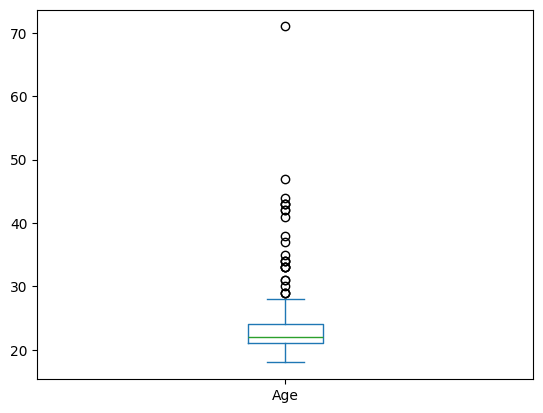

In [27]:
individual_df.plot(kind='box', y='Age')

A simple histogram to show the distribution of the ages of the respondents. Is this right skewed or left skewed?

<Axes: xlabel='Age'>

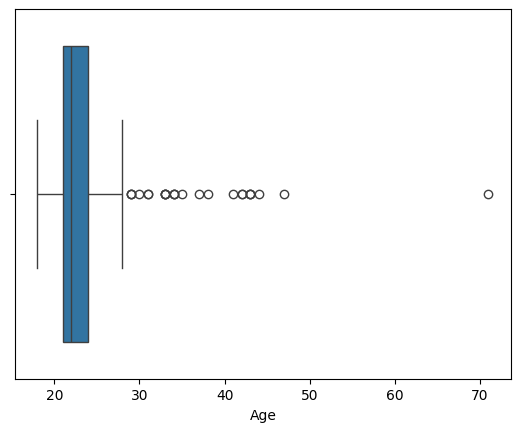

In [28]:
sns.boxplot(data= individual_df , x= 'Age')

<Axes: ylabel='Frequency'>

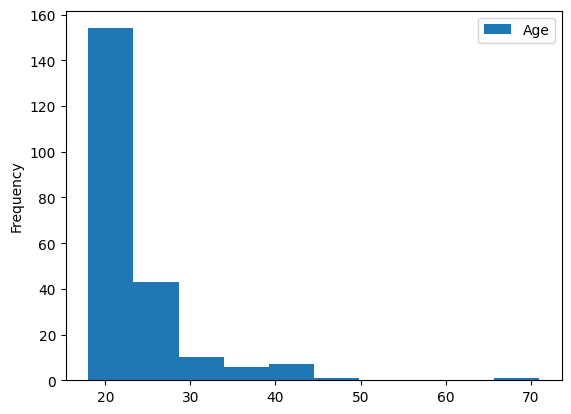

In [29]:
individual_df.plot(kind='hist', y='Age')

Q: From what education level do most of the respondents come from?

<Axes: xlabel='School_Education', ylabel='count'>

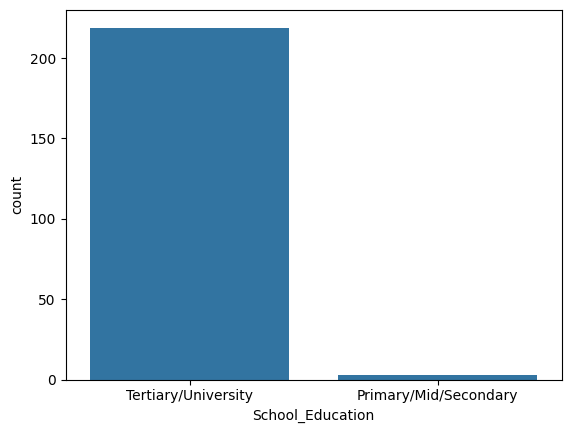

In [30]:
sns.countplot(data= individual_df, x= "School_Education")

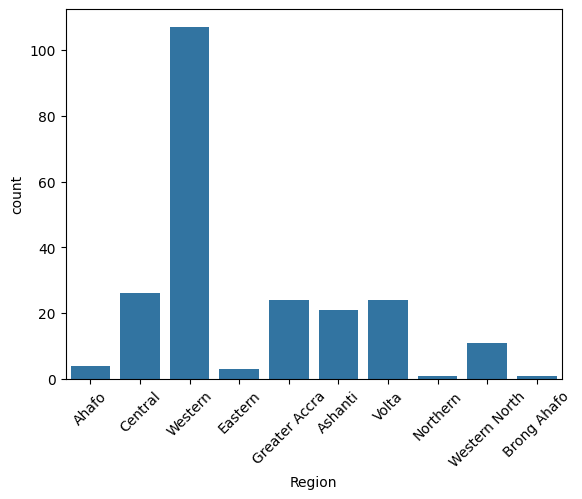

In [31]:
sns.countplot(data= individual_df , x= "Region")
plt.xticks(rotation=45) ;

Q: What is the occupation of the majority of the respondents?

In [32]:
individual_df.Occupation.value_counts()

,count
Occupation,
Student,167
Teacher,29
Other,26


<Axes: xlabel='count', ylabel='Occupation'>

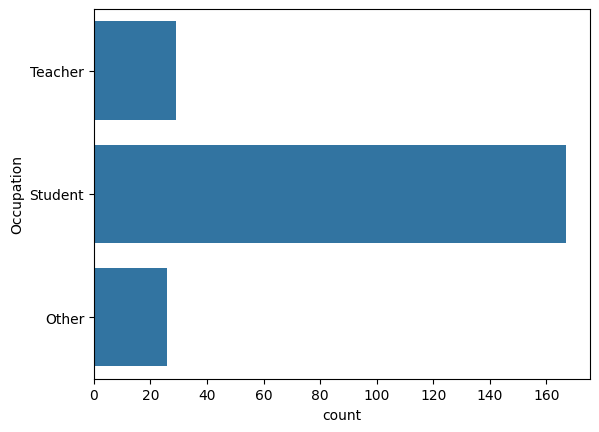

In [35]:
sns.countplot(data= individual_df, y='Occupation')

Q: Of all the people in the dataset, what percentage were aware of the COVID-19 pandemic?

In [36]:
individual_df.Aware_Coronavirus.value_counts (normalize=True)*100

,proportion
Aware_Coronavirus,
Yes,98.648649
No,1.351351


Out of curiosity, can you check the rows of the respondents who said they were unaware of the COVID-19 pandemic?

In [37]:
individual_df[individual_df.Aware_Coronavirus == 'No']

,id,Region,Gender,Age,School_Education,Occupation,Aware_Coronavirus,Know_About_Coronavirus,Personal_Risk,Stigma_Perception
47,1000203,Ashanti,Female,19.0,Tertiary/University,Student,No,It’s a virus that can cause a disease,No,Yes
82,1000313,Central,Female,21.0,Tertiary/University,Student,No,It’s a virus that can cause a disease,No,Yes
144,1000310,Western North,Female,21.0,Tertiary/University,Student,No,It’s a virus that can cause a disease,No,Yes


Is there anything unusual you note? I, for example, would expect someone who is **not** aware of the COVID-19 pandemic to have a missing value in the next column, `Know_About_Coronavirus`. This either speaks to a misunderstanding by the respondents during data collection, or poor survey design, such that the respondents were not given the option to say they were unaware of the COVID-19 pandemic.

The column `Personal_Risk` represents the question whether people thought that they were in risk of getting covid-19. <br>
Q: How many people thought they were at risk?

In [38]:
individual_df.Personal_Risk.value_counts()

,count
Personal_Risk,
No,119
Yes,59
Don´t know,44


Getting more specific, what is the average age of the people who thought they were at risk?

In [39]:
individual_df[individual_df.Personal_Risk == 'Yes'].Age.mean()

23.915254237288135

What about those who thought they were not at risk?

In [40]:
individual_df[individual_df.Personal_Risk == "No"].Age.mean()

23.823529411764707

What about those who thought they were unsure?

In [41]:
individual_df[individual_df.Personal_Risk == 'Don´t know'].Age.mean()

24.0

There doesn't seem to be much difference

Or we can use group by

In [42]:
individual_df.groupby('Personal_Risk').Age.mean()

,Age
Personal_Risk,
Don´t know,24.000000
No,23.823529
Yes,23.915254


In [43]:
individual_df.groupby('Personal_Risk')[['Gender' , 'Occupation']].value_counts()

Personal_Risk  Gender  Occupation
Don´t know     Female  Student       33
                       Teacher        4
                       Other          3
               Male    Other          2
                       Student        1
                       Teacher        1
No             Female  Student       90
                       Teacher       10
                       Other          6
               Male    Other          6
                       Teacher        5
                       Student        2
Yes            Female  Student       39
               Male    Other          6
               Female  Teacher        5
               Male    Teacher        4
               Female  Other          3
               Male    Student        2
Name: count, dtype: int64

In [44]:
individual_df.Personal_Risk.value_counts()

,count
Personal_Risk,
No,119
Yes,59
Don´t know,44


In [45]:
individual_df.describe(include='object')

,Region,Gender,School_Education,Occupation,Aware_Coronavirus,Know_About_Coronavirus,Personal_Risk,Stigma_Perception
count,222,222,222,222,222,222,222,222
unique,10,2,2,3,2,2,3,2
top,Western,Female,Tertiary/University,Student,Yes,It’s a virus that can cause a disease,No,Yes
freq,107,193,219,167,219,215,119,177


#### Prevention Steps

In [48]:
prevention_df = pd.read_csv('/content/drive/MyDrive/Nawiri Tech/Prevention_Steps.csv')

In [49]:
prevention_df.head()

,id,Prevention_Steps
0,1000205,Washing hands regularly using alcohol-based cl...
1,1000205,Covering mouth and nose when coughing or sneezing
2,1000205,Avoid close contact with anyone who has a feve...
3,1000205,Eliminate standing water
4,1000205,Cook meat and eggs well


Q: What are the most commonly reported prevention steps?

In [50]:
prevention_df.value_counts()

id       Prevention_Steps                                                                                         
1000100  Avoid close contact with anyone who has a fever and cough                                                    1
1000251  Avoid close contact with anyone who has a fever and cough                                                    1
1000248  Cook meat and eggs well                                                                                      1
         Covering mouth and nose when coughing or sneezing                                                            1
         Washing hands regularly using alcohol-based cleaner or soap / water                                          1
1000249  Avoid close contact with anyone who has a fever and cough                                                    1
         Cook meat and eggs well                                                                                      1
         Covering mouth and nose when coughing or sneezing                                                            1
         Washing hands regularly using alcohol-based cleaner or soap / water                                          1
1000250  Avoid close contact with anyone who has a fever and cough                                                    1
         Covering mouth and nose when coughing or sneezing                                                            1
         Washing hands regularly using alcohol-based cleaner or soap / water                                          1
1000251  Covering mouth and nose when coughing or sneezing                                                            1
1000248  Avoid close contact with anyone who has a fever and cough                                                    1
1000251  Washing hands regularly using alcohol-based cleaner or soap / water                                          1
1000252  Avoid close contact with anyone who has a fever and cough                                                    1
         Covering mouth and nose when coughing or sneezing                                                            1
         Washing hands regularly using alcohol-based cleaner or soap / water                                          1
1000253  Avoid close contact with anyone who has a fever and cough                                                    1
         Avoid unprotected direct contact with live animals and surfaces in contact with animals                      1
         Covering mouth and nose when coughing or sneezing                                                            1
         Washing hands regularly using alcohol-based cleaner or soap / water                                          1
1000254  Avoid close contact with anyone who has a fever and cough                                                    1
         Cook meat and eggs well                                                                                      1
1000248  Avoid unprotected direct contact with live animals and surfaces in contact with animals                      1
1000247  Washing hands regularly using alcohol-based cleaner or soap / water                                          1
1000254  Washing hands regularly using alcohol-based cleaner or soap / water                                          1
1000244  Avoid close contact with anyone who has a fever and cough                                                    1
1000241  Avoid close contact with anyone who has a fever and cough                                                    1
         Covering mouth and nose when coughing or sneezing                                                            1
         Eliminate standing water                                                                                     1
         Washing hands regularly using alcohol-based cleaner or soap / water                                          1
1000242  Avoid close contact with anyone who 

##### Merging dataframes

I would be curious to know if there was a `Region` where people were more likely to report a certain prevention step. For example, are people in `Region 1` more likely to wash their hands than people in `Region 2`?

For this case, I can quickly merge my data with the individual data to get the `Region` of each respondent.

In [67]:
merged_df = prevention_df.merge(individual_df[['id','Region']], on='id')
merged_df.head(10)

,id,Prevention_Steps,Region
0,1000205,Washing hands regularly using alcohol-based cl...,Ahafo
1,1000205,Covering mouth and nose when coughing or sneezing,Ahafo
2,1000205,Avoid close contact with anyone who has a feve...,Ahafo
3,1000205,Eliminate standing water,Ahafo
4,1000205,Cook meat and eggs well,Ahafo
5,1000205,Avoid unprotected direct contact with live ani...,Ahafo
6,1000205,Don't know,Ahafo
7,1000176,Washing hands regularly using alcohol-based cl...,Central
8,1000176,Covering mouth and nose when coughing or sneezing,Central
9,1000176,Avoid close contact with anyone who has a feve...,Central


Now, we can group the data by `Region` and `Prevention_Steps` to see what the most common prevention steps are, in each region.

In [52]:
merged_df.groupby('Region').Prevention_Steps.value_counts()

Region         Prevention_Steps                                                                                         
Ahafo          Avoid close contact with anyone who has a fever and cough                                                      4
               Covering mouth and nose when coughing or sneezing                                                              4
               Washing hands regularly using alcohol-based cleaner or soap / water                                            4
               Avoid unprotected direct contact with live animals and surfaces in contact with animals                        3
               Cook meat and eggs well                                                                                        2
               Don't know                                                                                                     1
               Eliminate standing water                                                                                       1
Ashanti        Covering mouth and nose when coughing or sneezing                                                             21
               Washing hands regularly using alcohol-based cleaner or soap / water                                           21
               Avoid close contact with anyone who has a fever and cough                                                     20
               Avoid unprotected direct contact with live animals and surfaces in contact with animals                       11
               Cook meat and eggs well                                                                                        9
               Eliminate standing water                                                                                       2
               Using sanitizers, avoid social gathering, using nose mask and staying at home.                                 1
Brong Ahafo    Avoid close contact with anyone who has a fever and cough                                                      1
               Avoid unprotected direct contact with live animals and surfaces in contact with animals                        1
               Cook meat and eggs well                                                                                        1
               Covering mouth and nose when coughing or sneezing                                                              1
               Washing hands regularly using alcohol-based cleaner or soap / water                                            1
Central        Covering mouth and nose when coughing or sneezing                                                             26
               Avoid close contact with anyone who has a fever and cough                                                     25
               Washing hands regularly using alcohol-based cleaner or soap / water                                           25
               Avoid unprotected direct contact with live animals and surfaces in contact with animals                       11
               Cook meat and eggs well                                                                                        8
               Eliminate standing water                                                                                       1
Eastern        Avoid close contact with anyone who has a fever and cough                                                      3
               Covering mouth and nose when coughing or sneezing                                                              3
               Washing hands regularly using alcohol-based cleaner or soap / water                                            3
Greater Accra  Covering mouth and nose when coughing or sneezing                                                             23
               Washing hands regularly using alcohol-based cleaner or soap / water                                           23
               Avoid close contact with

In the above, we first group by each region, and then we focus on the `Prevention_Steps` column. We then count the number of times each prevention step is reported in each region.<br>
However, it might be a bit misleading to see the above, as some regions are less represented in the dataset than others. For example, you Ahafo had only 4 people in total, as compared to Western's 107. So, it might be better to see the above as percentages.

In [53]:
merged_df.groupby('Region').Prevention_Steps.value_counts(normalize=True)

Region         Prevention_Steps                                                                                         
Ahafo          Avoid close contact with anyone who has a fever and cough                                                    0.210526
               Covering mouth and nose when coughing or sneezing                                                            0.210526
               Washing hands regularly using alcohol-based cleaner or soap / water                                          0.210526
               Avoid unprotected direct contact with live animals and surfaces in contact with animals                      0.157895
               Cook meat and eggs well                                                                                      0.105263
               Don't know                                                                                                   0.052632
               Eliminate standing water                                                                                     0.052632
Ashanti        Covering mouth and nose when coughing or sneezing                                                            0.247059
               Washing hands regularly using alcohol-based cleaner or soap / water                                          0.247059
               Avoid close contact with anyone who has a fever and cough                                                    0.235294
               Avoid unprotected direct contact with live animals and surfaces in contact with animals                      0.129412
               Cook meat and eggs well                                                                                      0.105882
               Eliminate standing water                                                                                     0.023529
               Using sanitizers, avoid social gathering, using nose mask and staying at home.                               0.011765
Brong Ahafo    Avoid close contact with anyone who has a fever and cough                                                    0.200000
               Avoid unprotected direct contact with live animals and surfaces in contact with animals                      0.200000
               Cook meat and eggs well                                                                                      0.200000
               Covering mouth and nose when coughing or sneezing                                                            0.200000
               Washing hands regularly using alcohol-based cleaner or soap / water                                          0.200000
Central        Covering mouth and nose when coughing or sneezing                                                            0.270833
               Avoid close contact with anyone who has a fever and cough                                                    0.260417
               Washing hands regularly using alcohol-based cleaner or soap / water                                          0.260417
               Avoid unprotected direct contact with live animals and surfaces in contact with animals                      0.114583
               Cook meat and eggs well                                                                                      0.083333
               Eliminate standing water                                                                                     0.010417
Eastern        Avoid close contact with anyone who has a fever and cough                                                    0.333333
               Covering mouth and nose when coughing or sneezing                                                            0.333333
               Washing hands regularly using alcohol-based cleaner or soap / water                                          0.333333
Greater Accra  Covering mouth and nose when coughing or sneezing                                                            0.270588
               Washing

To take it a bit further, we can create a pie chart to show the percentage of people in each region who reported each prevention step.

In [54]:
# first get a specific region eg Western
region_df = merged_df[merged_df.Region=='Western']
region_df[:5]

,id,Prevention_Steps,Region
10,1000301,Washing hands regularly using alcohol-based cl...,Western
11,1000301,Covering mouth and nose when coughing or sneezing,Western
12,1000301,Avoid close contact with anyone who has a feve...,Western
13,1000301,Staying in doors going out only when its necce...,Western
14,1000315,Washing hands regularly using alcohol-based cl...,Western


In [55]:
region_df.Prevention_Steps.value_counts(normalize=True)
# we will use the percents to plot the pie chart

,proportion
Prevention_Steps,
Washing hands regularly using alcohol-based cleaner or soap / water,0.270886
Covering mouth and nose when coughing or sneezing,0.263291
Avoid close contact with anyone who has a fever and cough,0.253165
Avoid unprotected direct contact with live animals and surfaces in contact with animals,0.126582
Cook meat and eggs well,0.063291
Eliminate standing water,0.005063
Staying in doors going out only when its neccessary,0.002532
Wiping and cleaning surfaces regularly with disinfectants,0.002532
social distance,0.002532


In [56]:
# values will be the percents
values = region_df.Prevention_Steps.value_counts(normalize=True)
# labels will be the names of the preventive measures(the index of the values)
preventive_measures = values.index

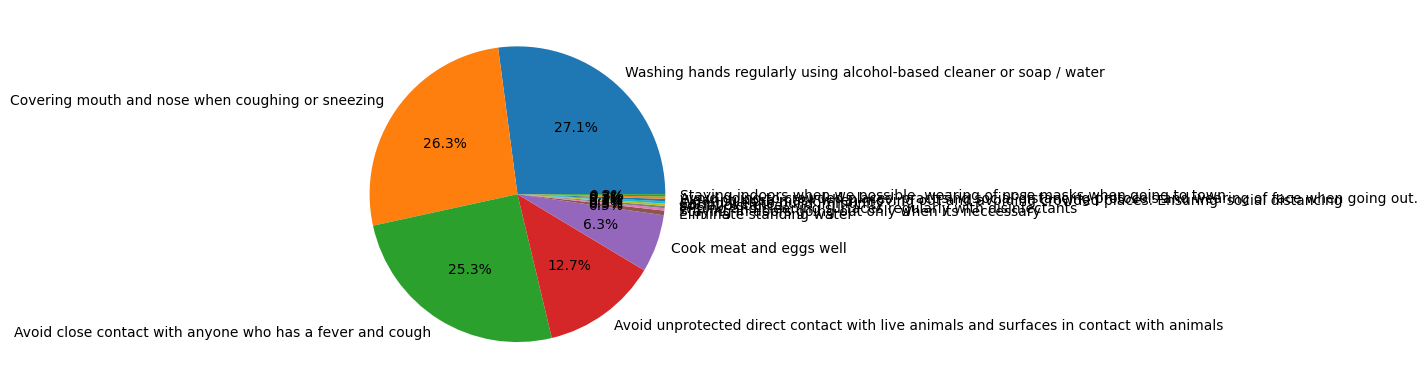

In [57]:
plt.pie(values, labels=preventive_measures, autopct='%1.1f%%');

Pie charts are not the best way some times. I'll clean this up by only showing the top 5 prevention steps. The others will be grouped into an `Others` category.

In [58]:
# slice till the first 5 values
top_5 = values[:5]
# create an 'Others' category that sums the rest of the values
others = values[5:].sum()
# create a series with the 'Others' category
others_series = pd.Series([others], index=['Others'])
# concatenate the top 5 and the 'Others' category
values = pd.concat([top_5, pd.Series([others], index=['Others'])])

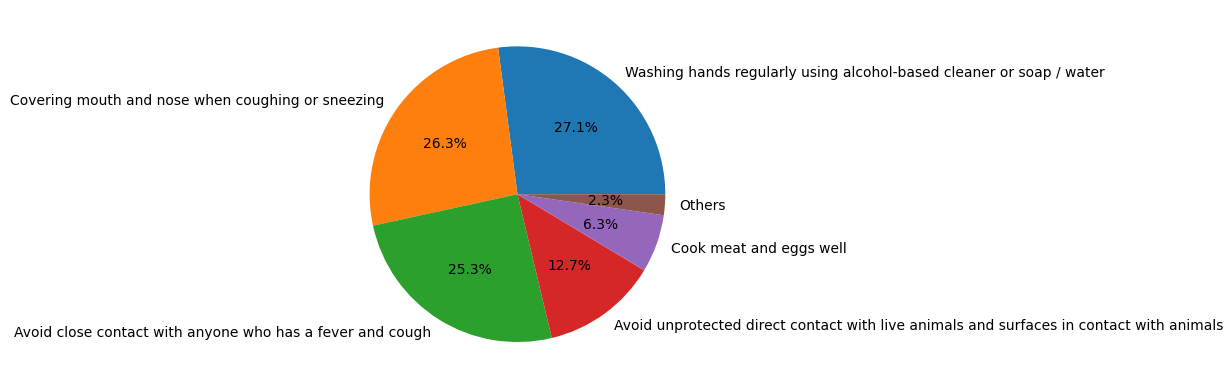

In [59]:
plt.pie(values, labels=values.index, autopct='%1.1f%%');

This is a bit more informative. We can see that the most common prevention step in the Western region is washing hands, followed by covering the mouth and nose...

Another visualization we can make is a bar plot

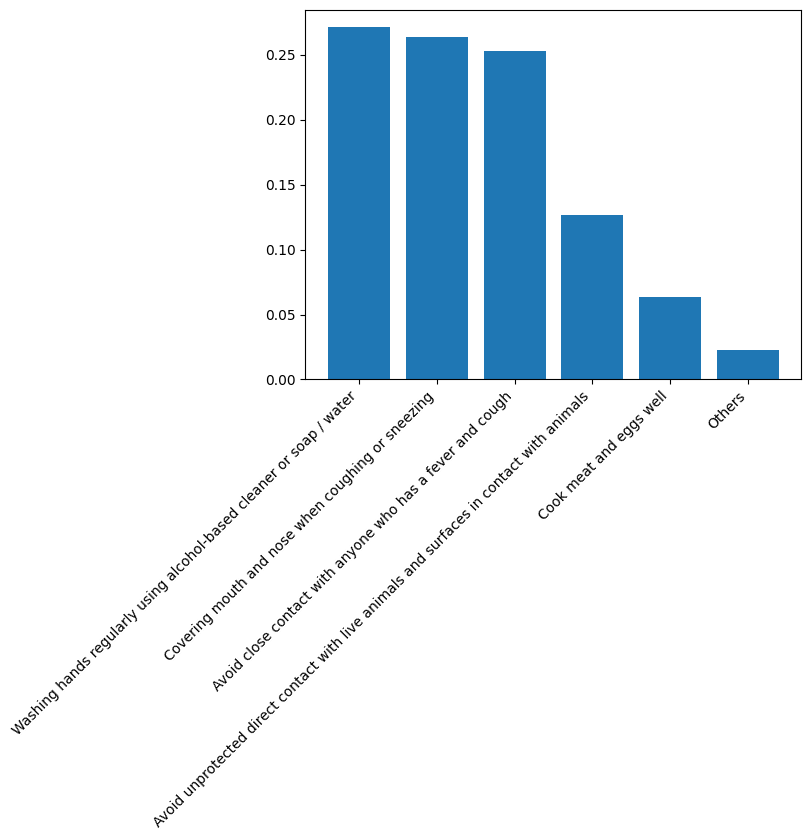

In [60]:
plt.bar(values.index, values)
plt.xticks(rotation=45, ha= 'right');

The labels are a bit long, but I hope it makes more sense.

##### Task: Create a function that receives a region as input, and creates a pie chart of the most common prevention steps in that region.

Hint: It's just the same process we followed above, only generalizing it.

In [69]:
merged_df.head()

,id,Prevention_Steps,Region
0,1000205,Washing hands regularly using alcohol-based cl...,Ahafo
1,1000205,Covering mouth and nose when coughing or sneezing,Ahafo
2,1000205,Avoid close contact with anyone who has a feve...,Ahafo
3,1000205,Eliminate standing water,Ahafo
4,1000205,Cook meat and eggs well,Ahafo


In [77]:
merged_df.tail()

,id,Prevention_Steps,Region
821,1000265,Avoid unprotected direct contact with live ani...,Western
822,1000311,Washing hands regularly using alcohol-based cl...,Ashanti
823,1000311,Covering mouth and nose when coughing or sneezing,Ashanti
824,1000311,Avoid close contact with anyone who has a feve...,Ashanti
825,1000311,Cook meat and eggs well,Ashanti


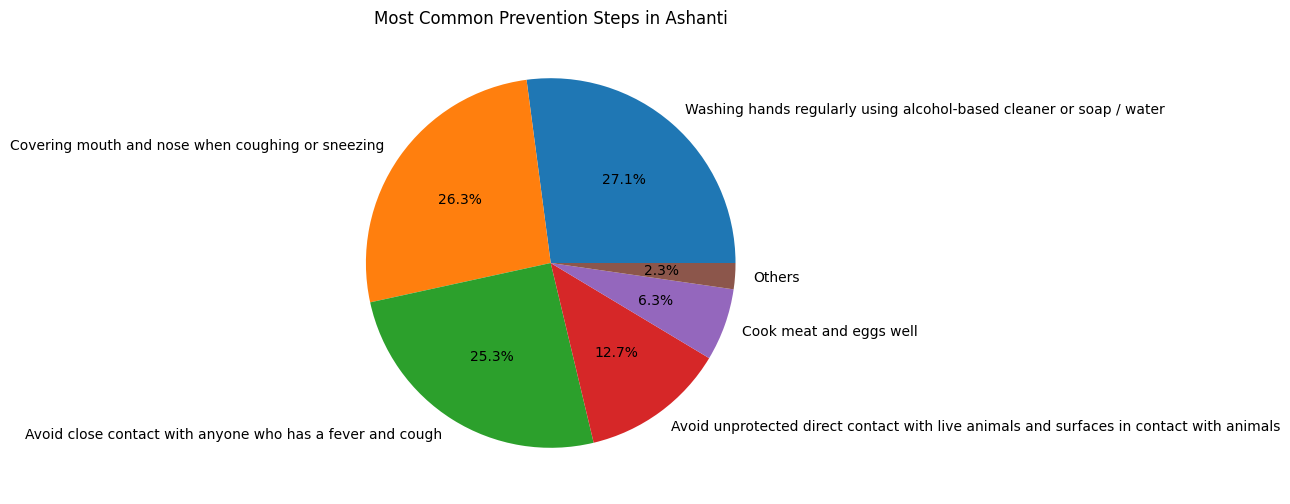

In [78]:
def create_pie_chart(region):
  if region in merged_df['Region'].unique():
        region_data = merged_df[merged_df['Region'] == region]
        prevention_steps = region_data['Prevention_Steps']
        counts = merged_df.Prevention_Steps.value_counts(normalize=True)

        top_5 = counts[:5]
        # create an 'Others' category that sums the rest of the values
        others = counts[5:].sum()
        # create a series with the 'Others' category
        others_series = pd.Series([others], index=['Others'])
        # concatenate the top 5 and the 'Others' category
        counts = pd.concat([top_5, pd.Series([others], index=['Others'])])
        plt.figure(figsize=(6, 6))
        plt.pie(values, labels=values.index, autopct='%1.1f%%');

        #plt.pie(counts, labels=prevention_steps, autopct='%1.1f%%', startangle=140)
        plt.title(f"Most Common Prevention Steps in {region}")
        plt.show()
  else:
        print("Region not found in the data.")

# Test the function
create_pie_chart('Ashanti')

#### Action_If_Symptoms

In [82]:
actions_df = pd.read_csv('/content/drive/MyDrive/Nawiri Tech/Action_If_Symptoms.csv')

In [83]:
actions_df.head(5)

,id,Action_If_Symptoms
0,1000205,I will look for a more experienced relative to...
1,1000205,I will go to the hospital / health unit
2,1000205,I will go to the neighborhood nurse
3,1000205,I will buy medicines at the market
4,1000205,I will look for the traditional healer


Q: What is the most common action that individuals would take if they had symptoms of COVID-19?

In [84]:
actions_df.Action_If_Symptoms.value_counts()

,count
Action_If_Symptoms,
I will go to the hospital / health unit,187
I would stay in quarantine,174
I will look for a more experienced relative to advise me on what to do,33
I will go to the neighborhood nurse,33
I will buy medicines at the market,3
I will look for the traditional healer,1
Then call the emergency number to come and take me to a quarantine center for testing and treatment,1
Call the emergency numbers given by the Ghana Health Service,1
I will call any of the emergency numbers.,1


Now, can you find out if there is a difference in the most common action taken by people in different regions?<br>
*Hint: You can follow the same process as above*

In [85]:
actions_df.Action_If_Symptoms.value_counts(normalize=True)

,proportion
Action_If_Symptoms,
I will go to the hospital / health unit,0.424036
I would stay in quarantine,0.394558
I will look for a more experienced relative to advise me on what to do,0.074830
I will go to the neighborhood nurse,0.074830
I will buy medicines at the market,0.006803
I will look for the traditional healer,0.002268
Then call the emergency number to come and take me to a quarantine center for testing and treatment,0.002268
Call the emergency numbers given by the Ghana Health Service,0.002268
I will call any of the emergency numbers.,0.002268


In [95]:
modified_df = actions_df.merge(individual_df[['id','Region']], on='id')


In [96]:
modified_df.head()

,id,Action_If_Symptoms,Region
0,1000205,I will look for a more experienced relative to...,Ahafo
1,1000205,I will go to the hospital / health unit,Ahafo
2,1000205,I will go to the neighborhood nurse,Ahafo
3,1000205,I will buy medicines at the market,Ahafo
4,1000205,I will look for the traditional healer,Ahafo


In [97]:
modified_df.groupby('Region').value_counts()

Region         id       Action_If_Symptoms                                                                                  
Ahafo          1000151  I would stay in quarantine                                                                              1
               1000205  I will buy medicines at the market                                                                      1
                        I will go to the hospital / health unit                                                                 1
                        I will go to the neighborhood nurse                                                                     1
                        I will look for a more experienced relative to advise me on what to do                                  1
                        I will look for the traditional healer                                                                  1
                        I would stay in quarantine                                                                              1
               1000210  I will go to the hospital / health unit                                                                 1
               1000281  I will go to the hospital / health unit                                                                 1
                        I will go to the neighborhood nurse                                                                     1
                        I will look for a more experienced relative to advise me on what to do                                  1
                        I would stay in quarantine                                                                              1
Ashanti        1000112  I will go to the hospital / health unit                                                                 1
                        I would stay in quarantine                                                                              1
               1000134  I will go to the hospital / health unit                                                                 1
               1000139  I will go to the hospital / health unit                                                                 1
                        I would stay in quarantine                                                                              1
               1000147  I will go to the hospital / health unit                                                                 1
                        I would stay in quarantine                                                                              1
               1000154  I will go to the hospital / health unit                                                                 1
                        I would stay in quarantine                                                                              1
               1000180  I will go to the hospital / health unit                                                                 1
                        I would stay in quarantine                                                                              1
               1000188  I will go to the hospital / health unit                                                                 1
               1000203  I will go to the hospital / health unit                                                                 1
               1000224  I will go to the hospital / health unit                                                                 1
                        I will look for a more experienced relative to advise me on what to do                                  1
               1000235  I will go to the hospital / health unit                                                                 1
                        I will look for a more experienced relative to advise me on what to do                                  1
                        I would stay in quarantine                                                       

#### Info_Source and Trust_Channel

In [99]:
info_source = pd.read_csv('/content/drive/MyDrive/Nawiri Tech/Info_Source.csv')
trusted_channels = pd.read_csv('/content/drive/MyDrive/Nawiri Tech/Trust_Channel.csv')

In [100]:
info_source.head(5)

,id,Info_Source
0,1000205,Radio
1,1000205,TV
2,1000205,WhatsApp
3,1000205,Social Media (not WhatsApp)
4,1000205,Health unit/Health care worker


Q: What is the most common source of information used by the respondents for information on COVID-19?

In [102]:
info_source.Info_Source.value_counts()

,count
Info_Source,
TV,217
Radio,207
Social Media (not WhatsApp),186
WhatsApp,182
Friends,167
Family members,161
Health unit/Health care worker,127
Religious leaders,121
Community health workers,93


Q:Is there a difference in the sources of info that respondents in different regions used to receive information about COVID-19?'

In [109]:
new_info= info_source.merge(individual_df[['id','Region']], on = "id")


In [110]:
new_info.head()

,id,Info_Source,Region
0,1000205,Radio,Ahafo
1,1000205,TV,Ahafo
2,1000205,WhatsApp,Ahafo
3,1000205,Social Media (not WhatsApp),Ahafo
4,1000205,Health unit/Health care worker,Ahafo


In [112]:
new_info.groupby('Region').value_counts()

Region         id       Info_Source                  
Ahafo          1000151  Social Media (not WhatsApp)      1
               1000205  Any person from the community    1
                        Community health workers         1
                        Community leaders                1
                        Family members                   1
                                                        ..
Western North  1000316  Radio                            1
                        Religious leaders                1
                        Social Media (not WhatsApp)      1
                        TV                               1
                        WhatsApp                         1
Name: count, Length: 1701, dtype: int64

#### Info desired

Using the datasets `Info_Desired`, and `Info_Recieved`, answer the questions, <br>
1. What information are the respondents most knowledgable about? <br>
2. What information are the respondents least knowledgable about? <br>
3. What information do the respondents desire most? <br>
4. What information do the respondents both, not know, and not desire?

In [118]:
info_desired=pd.read_csv('/content/drive/MyDrive/Nawiri Tech/Info_Desired.csv')
info_desired.head()

,id,Info_Desired
0,1000205,How to protect yourself from the disease?
1,1000176,How to treat it
2,1000301,How to protect yourself from the disease?
3,1000301,Symptoms of the new coronavirus disease
4,1000301,How it is transmitted


In [119]:
info_desired.Info_Desired.value_counts()

,count
Info_Desired,
How to protect yourself from the disease?,138
How to treat it,138
What to do if you have the symptoms,132
Symptoms of the new coronavirus disease,131
How it is transmitted,123
Most at risk groups,108
Is there any cure or disease found,1
How did the virus come into existence.,1
"How long it stays before it’s identified, or the number of hours or days an infected person can transmit to an uninfected person",1


In [121]:
info_received = pd.read_csv('/content/drive/MyDrive/Nawiri Tech/Info_Received.csv')
info_received.head()

,id,Info_Received
0,1000205,How to protect yourself from the disease?
1,1000205,Symptoms of the new coronavirus disease
2,1000205,How it is transmitted
3,1000205,What to do if you have the symptoms
4,1000205,Risks and complications


In [122]:
info_received.Info_Received.value_counts()

,count
Info_Received,
How to protect yourself from the disease?,221
How it is transmitted,212
Symptoms of the new coronavirus disease,210
What to do if you have the symptoms,206
Risks and complications,160
Number of people infected with the virus,1
treatment,1
Treatment of mild symptoms,1
"Myths about the disease,",1


### Conclusion

Great! We've done quite a bit on this dataset, but there's still a lot more that can be done. You can still proceed with other tables and ask and answer your own questions. I hope this has given you a good idea of how to approach data analysis. We'll practice now on more datasets.